# **Yeast spotting analysis**

In [9]:
from bioimage_quant import bioimage_quant as bq
import glob
%matplotlib inline

## **Image cropping**

Box size = 275000 pixels


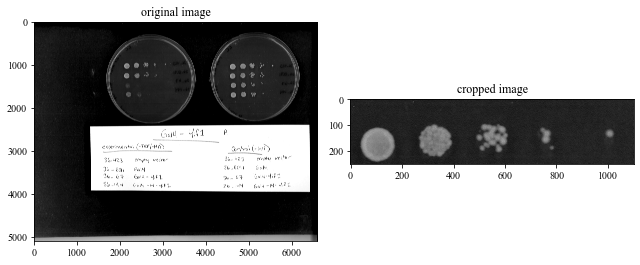

In [2]:
f = 'yeast_spotting_example.png'

x1 = 2050
y1 = 850
x2 = 3150
y2 = 1100

output = "f_p1_row1.npy"

f_row1 = bq.image_cropping(f, x1, y1, x2, y2, output)

Box size = 275000 pixels


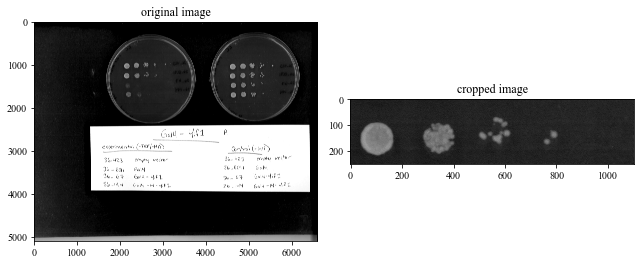

In [3]:
f = 'yeast_spotting_example.png'

x1 = 2050
y1 = 1100
x2 = 3150
y2 = 1350

output = "f_p1_row2.npy"

f_p1_row2 = bq.image_cropping(f, x1, y1, x2, y2, output)

Box size = 275000 pixels


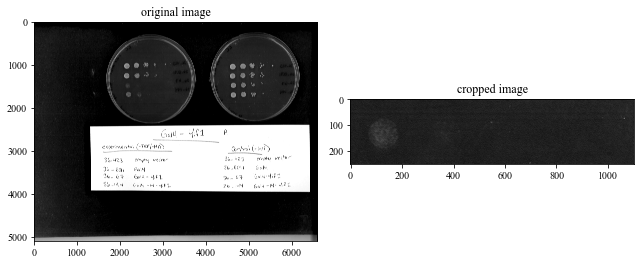

In [4]:
f = 'yeast_spotting_example.png'

x1 = 2050
y1 = 1350
x2 = 3150
y2 = 1600

output = "f_p1_row3.npy"

f_p1_row3 = bq.image_cropping(f, x1, y1, x2, y2, output)

## Intensity calculations

In [31]:
# grab image arrays from saved numpy files

arrays = glob.glob("*.npy")

data = []

for i in range(len(arrays)):
    data.append(np.load(arrays[i]))

f_p1_row1.npy


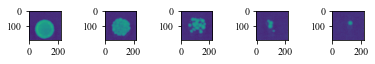

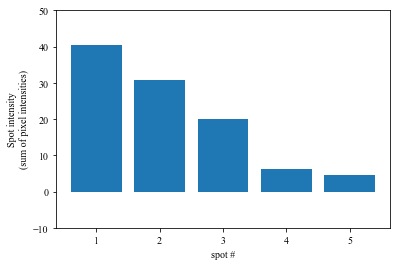

f_p1_row2.npy


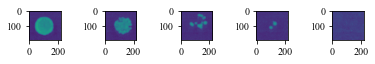

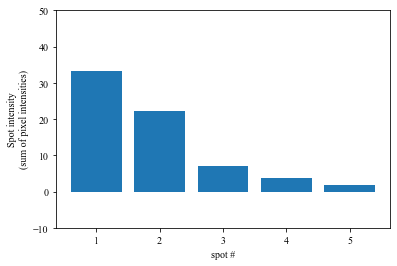

f_p1_row3.npy


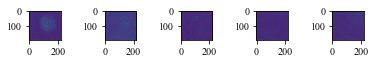

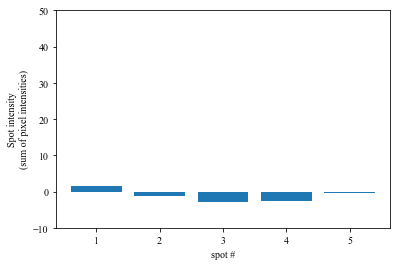

,plate_row_identifier,spot,value,image_path
0,f_p1_row1.npy,1,40.471236,yeast_spotting_example.png
1,f_p1_row1.npy,2,30.769236,yeast_spotting_example.png
2,f_p1_row1.npy,3,20.146297,yeast_spotting_example.png
3,f_p1_row1.npy,4,6.250539,yeast_spotting_example.png
4,f_p1_row1.npy,5,4.485691,yeast_spotting_example.png
5,f_p1_row2.npy,1,33.350970,yeast_spotting_example.png
6,f_p1_row2.npy,2,22.310636,yeast_spotting_example.png
7,f_p1_row2.npy,3,7.167939,yeast_spotting_example.png
8,f_p1_row2.npy,4,3.707970,yeast_spotting_example.png
9,f_p1_row2.npy,5,1.785727,yeast_spotting_example.png


In [32]:
# quantify intensities & do background subtraction en masse using array files

data_df = pd.DataFrame(columns=["plate_row_identifier", "spot", "value"])

all_data = []

spots = [1,2,3,4,5]

for i in range(len(data)):
    
    num_samples = 5
    
    print(arrays[i])
    val = bq.spot_calculator(data[i], num_samples)
    
    df = pd.DataFrame({"plate_row_identifier":arrays[i], "spot":spots, "value":val})
    
    data_df = pd.concat([data_df, df], axis=0)
    
data_df = data_df.reset_index(drop=True)
    
# add some metadata
    
mapping = {"f":'yeast_spotting_example.png'}

info = data_df["plate_row_identifier"].values
filemap = [i.split("_")[0] for i in info]

paths = []

for i in filemap:
    paths.append(mapping[i])
    
data_df["image_path"] = paths

# save aggregate data out to csv
data_df.to_csv("data_output.csv")
data_df